In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mbti.csv")

In [3]:
df = df.drop(columns = ['stat'])

In [4]:
df['mbti'].unique()

array(['ESFP', 'XXXX', 'ESFJ', 'ESTP', 'ESTJ', 'ENFP', 'ENFJ', 'ENTP',
       'ENTJ', 'ISFP', 'ISFJ', 'ISTP', 'ISTJ', 'INFP', 'INFJ', 'INTP',
       'INTJ'], dtype=object)

In [5]:
# drop XXXX
df = df[df['mbti']!= "XXXX"]

In [6]:
# drop NaN in enneagram
df = df[df['enneagram'].notna()]

In [7]:
## only get the first number
enn_1 = []
for x in df.enneagram.values:
    enn_1.append(int(x[0]))
enn_2 = []
for x in df.enneagram.values:
    enn_2.append(int(x[-1]))

In [8]:
df['enn_1'] = enn_1
df['enn_2'] = enn_2

In [9]:
## returns a picture
df.img_url[5]

'https://www.personality-database.com/profile_images/1936.png?=undefined'

In [10]:
df['movie'] = df['movie'].str.replace(r"\(.*\)","")

/var/folders/d4/p5txydrd2bbdjmss4gy6zmy80000gp/T/ipykernel_68249/2910954396.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['movie'] = df['movie'].str.replace(r"\(.*\)","")


In [11]:
df

,mbti,enneagram,role,movie,img_url,enn_1,enn_2
0,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe,https://www.personality-database.com/profile_i...,7,6
1,ESFP,8w7,Anakin Skywalker,Star Wars,https://www.personality-database.com/profile_i...,8,7
2,ESFP,6w7,Ron Weasley,Harry Potter,https://www.personality-database.com/profile_i...,6,7
3,ESFP,7w8,Bellatrix Lestrange,Harry Potter,https://www.personality-database.com/profile_i...,7,8
4,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/profile_i...,7,6
...,...,...,...,...,...,...,...
18733,INTJ,3w2,Roman Bridger,Scream,https://www.personality-database.com/images/pr...,3,2
18734,INTJ,6w5,Richard Parker,The Amazing Spider-Man,https://www.personality-database.com/images/pr...,6,5
18736,INTJ,5w4,Dr. Caroline Caldwell,The Girl with All the Gifts,https://www.personality-database.com/images/pr...,5,4
18737,INTJ,5w6,Richard,Eat Pray Love,https://www.personality-database.com/images/pr...,5,6


In [12]:
df.to_csv('mbti_clean.csv', index=False)

In [13]:
## check
pd.read_csv("mbti_clean.csv")

,mbti,enneagram,role,movie,img_url,enn_1,enn_2
0,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe,https://www.personality-database.com/profile_i...,7,6
1,ESFP,8w7,Anakin Skywalker,Star Wars,https://www.personality-database.com/profile_i...,8,7
2,ESFP,6w7,Ron Weasley,Harry Potter,https://www.personality-database.com/profile_i...,6,7
3,ESFP,7w8,Bellatrix Lestrange,Harry Potter,https://www.personality-database.com/profile_i...,7,8
4,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/profile_i...,7,6
...,...,...,...,...,...,...,...
11746,INTJ,3w2,Roman Bridger,Scream,https://www.personality-database.com/images/pr...,3,2
11747,INTJ,6w5,Richard Parker,The Amazing Spider-Man,https://www.personality-database.com/images/pr...,6,5
11748,INTJ,5w4,Dr. Caroline Caldwell,The Girl with All the Gifts,https://www.personality-database.com/images/pr...,5,4
11749,INTJ,5w6,Richard,Eat Pray Love,https://www.personality-database.com/images/pr...,5,6


In [14]:
groups = df.groupby(['mbti','enn_1']).count().reset_index()

In [15]:
for x in groups.mbti.unique():
    display(groups[groups['mbti']==x])

,mbti,enn_1,enneagram,role,movie,img_url,enn_2
0,ENFJ,1,62,62,62,62,62
1,ENFJ,2,188,188,188,188,188
2,ENFJ,3,102,102,102,102,102
3,ENFJ,4,23,23,23,23,23
4,ENFJ,5,5,5,5,5,5
5,ENFJ,6,31,31,31,31,31
6,ENFJ,7,33,33,33,33,33
7,ENFJ,8,23,23,23,23,23
8,ENFJ,9,46,46,46,46,46


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
9,ENFP,1,8,8,8,8,8
10,ENFP,2,73,73,73,73,73
11,ENFP,3,34,34,34,34,34
12,ENFP,4,66,66,66,66,66
13,ENFP,5,17,17,17,17,17
14,ENFP,6,92,92,92,92,92
15,ENFP,7,316,316,316,316,316
16,ENFP,8,15,15,15,15,15
17,ENFP,9,32,32,32,32,32


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
18,ENTJ,1,34,34,34,34,34
19,ENTJ,2,5,5,5,5,5
20,ENTJ,3,199,199,199,199,199
21,ENTJ,4,2,2,2,2,2
22,ENTJ,5,17,17,17,17,17
23,ENTJ,6,30,30,30,30,30
24,ENTJ,7,13,13,13,13,13
25,ENTJ,8,275,275,275,275,275
26,ENTJ,9,8,8,8,8,8


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
27,ENTP,1,3,3,3,3,3
28,ENTP,2,3,3,3,3,3
29,ENTP,3,93,93,93,93,93
30,ENTP,4,18,18,18,18,18
31,ENTP,5,62,62,62,62,62
32,ENTP,6,57,57,57,57,57
33,ENTP,7,339,339,339,339,339
34,ENTP,8,76,76,76,76,76
35,ENTP,9,16,16,16,16,16


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
36,ESFJ,1,47,47,47,47,47
37,ESFJ,2,334,334,334,334,334
38,ESFJ,3,93,93,93,93,93
39,ESFJ,4,11,11,11,11,11
40,ESFJ,5,3,3,3,3,3
41,ESFJ,6,104,104,104,104,104
42,ESFJ,7,20,20,20,20,20
43,ESFJ,8,21,21,21,21,21
44,ESFJ,9,43,43,43,43,43


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
45,ESFP,1,2,2,2,2,2
46,ESFP,2,58,58,58,58,58
47,ESFP,3,124,124,124,124,124
48,ESFP,4,27,27,27,27,27
49,ESFP,5,2,2,2,2,2
50,ESFP,6,103,103,103,103,103
51,ESFP,7,507,507,507,507,507
52,ESFP,8,55,55,55,55,55
53,ESFP,9,47,47,47,47,47


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
54,ESTJ,1,162,162,162,162,162
55,ESTJ,2,14,14,14,14,14
56,ESTJ,3,211,211,211,211,211
57,ESTJ,4,5,5,5,5,5
58,ESTJ,5,8,8,8,8,8
59,ESTJ,6,124,124,124,124,124
60,ESTJ,7,16,16,16,16,16
61,ESTJ,8,328,328,328,328,328
62,ESTJ,9,10,10,10,10,10


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
63,ESTP,1,5,5,5,5,5
64,ESTP,2,10,10,10,10,10
65,ESTP,3,168,168,168,168,168
66,ESTP,4,9,9,9,9,9
67,ESTP,5,8,8,8,8,8
68,ESTP,6,51,51,51,51,51
69,ESTP,7,424,424,424,424,424
70,ESTP,8,357,357,357,357,357
71,ESTP,9,23,23,23,23,23


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
72,INFJ,1,120,120,120,120,120
73,INFJ,2,76,76,76,76,76
74,INFJ,3,26,26,26,26,26
75,INFJ,4,84,84,84,84,84
76,INFJ,5,84,84,84,84,84
77,INFJ,6,86,86,86,86,86
78,INFJ,7,5,5,5,5,5
79,INFJ,8,9,9,9,9,9
80,INFJ,9,99,99,99,99,99


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
81,INFP,1,22,22,22,22,22
82,INFP,2,34,34,34,34,34
83,INFP,3,6,6,6,6,6
84,INFP,4,294,294,294,294,294
85,INFP,5,50,50,50,50,50
86,INFP,6,115,115,115,115,115
87,INFP,7,18,18,18,18,18
88,INFP,8,1,1,1,1,1
89,INFP,9,227,227,227,227,227


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
90,INTJ,1,79,79,79,79,79
91,INTJ,2,3,3,3,3,3
92,INTJ,3,56,56,56,56,56
93,INTJ,4,20,20,20,20,20
94,INTJ,5,164,164,164,164,164
95,INTJ,6,63,63,63,63,63
96,INTJ,7,2,2,2,2,2
97,INTJ,8,104,104,104,104,104
98,INTJ,9,5,5,5,5,5


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
99,INTP,1,6,6,6,6,6
100,INTP,2,1,1,1,1,1
101,INTP,3,7,7,7,7,7
102,INTP,4,31,31,31,31,31
103,INTP,5,297,297,297,297,297
104,INTP,6,80,80,80,80,80
105,INTP,7,8,8,8,8,8
106,INTP,8,7,7,7,7,7
107,INTP,9,36,36,36,36,36


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
108,ISFJ,1,118,118,118,118,118
109,ISFJ,2,243,243,243,243,243
110,ISFJ,3,20,20,20,20,20
111,ISFJ,4,22,22,22,22,22
112,ISFJ,5,14,14,14,14,14
113,ISFJ,6,242,242,242,242,242
114,ISFJ,7,3,3,3,3,3
115,ISFJ,8,4,4,4,4,4
116,ISFJ,9,231,231,231,231,231


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
117,ISFP,1,14,14,14,14,14
118,ISFP,2,55,55,55,55,55
119,ISFP,3,27,27,27,27,27
120,ISFP,4,224,224,224,224,224
121,ISFP,5,17,17,17,17,17
122,ISFP,6,177,177,177,177,177
123,ISFP,7,44,44,44,44,44
124,ISFP,8,21,21,21,21,21
125,ISFP,9,306,306,306,306,306


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
126,ISTJ,1,306,306,306,306,306
127,ISTJ,2,17,17,17,17,17
128,ISTJ,3,40,40,40,40,40
129,ISTJ,4,11,11,11,11,11
130,ISTJ,5,85,85,85,85,85
131,ISTJ,6,280,280,280,280,280
132,ISTJ,7,1,1,1,1,1
133,ISTJ,8,80,80,80,80,80
134,ISTJ,9,44,44,44,44,44


,mbti,enn_1,enneagram,role,movie,img_url,enn_2
135,ISTP,1,10,10,10,10,10
136,ISTP,2,6,6,6,6,6
137,ISTP,3,36,36,36,36,36
138,ISTP,4,12,12,12,12,12
139,ISTP,5,110,110,110,110,110
140,ISTP,6,174,174,174,174,174
141,ISTP,7,78,78,78,78,78
142,ISTP,8,266,266,266,266,266
143,ISTP,9,138,138,138,138,138


In [34]:
mbti_counts = df.groupby(['mbti']).count().reset_index()

mbti_counts.drop(['role', 'movie', 'img_url', 'enn_1', 'enn_2', 'downthemall', 'img_filepath'],axis = 1, inplace=True)

mbti_counts.rename(columns={"enneagram": "count"}, inplace=True)



In [36]:
print(len(df))

11751


In [50]:
mbti_counts.head()
# mbti_counts['percentage'] = int(mbti_counts['count'])/len(df)

mbti_counts['percentage'] = mbti_counts['count'].apply(lambda x: str(round((int(x)/len(df))*100))+'%')

In [ ]:
mbti_counts.to_csv('mbti_counts.csv', index=False)

In [1]:
pd.read_csv("mbti_counts.csv")

NameError: name 'pd' is not defined

In [19]:
df = pd.read_csv('mbti_clean.csv')

In [23]:
df['downthemall']=("<a href='"+df.img_url.values+"'></a>")

In [27]:
df[df['img_url']=='https://www.personality-database.com/images/profile_transparent.png'] 

,mbti,enneagram,role,movie,img_url,enn_1,enn_2,downthemall
108,ESFP,3w4,Félicie,Leap! / Ballerina,https://www.personality-database.com/images/pr...,3,4,<a href='https://www.personality-database.com/...
119,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/images/pr...,7,6,<a href='https://www.personality-database.com/...
123,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/images/pr...,7,6,<a href='https://www.personality-database.com/...
135,ESFP,7w8,Donnie Azoff,The Wolf of Wall Street,https://www.personality-database.com/images/pr...,7,8,<a href='https://www.personality-database.com/...
176,ESFP,7w8,"John Allerdyce ""Pyro""",X-Men Cinematic Universe,https://www.personality-database.com/images/pr...,7,8,<a href='https://www.personality-database.com/...
...,...,...,...,...,...,...,...,...
11746,INTJ,3w2,Roman Bridger,Scream,https://www.personality-database.com/images/pr...,3,2,<a href='https://www.personality-database.com/...
11747,INTJ,6w5,Richard Parker,The Amazing Spider-Man,https://www.personality-database.com/images/pr...,6,5,<a href='https://www.personality-database.com/...
11748,INTJ,5w4,Dr. Caroline Caldwell,The Girl with All the Gifts,https://www.personality-database.com/images/pr...,5,4,<a href='https://www.personality-database.com/...
11749,INTJ,5w6,Richard,Eat Pray Love,https://www.personality-database.com/images/pr...,5,6,<a href='https://www.personality-database.com/...


In [34]:
df['img_url'][0]

'https://www.personality-database.com/profile_images/800.png?=undefined'

In [61]:
imgs = df['img_url']
img_filepath=[]
for x in imgs:
    ind = x.rfind('/')
    end = x.rfind('.png')
    substr = 'downthemall/'+x[ind+1:end+4]
    img_filepath.append(substr)

In [62]:
df['img_filepath'] = img_filepath

In [65]:
df[df['img_filepath']=='downthemall/profile_transparent.png']

,mbti,enneagram,role,movie,img_url,enn_1,enn_2,downthemall,img_filepath
108,ESFP,3w4,Félicie,Leap! / Ballerina,https://www.personality-database.com/images/pr...,3,4,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
119,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/images/pr...,7,6,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
123,ESFP,7w6,Simba,The Lion King,https://www.personality-database.com/images/pr...,7,6,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
135,ESFP,7w8,Donnie Azoff,The Wolf of Wall Street,https://www.personality-database.com/images/pr...,7,8,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
176,ESFP,7w8,"John Allerdyce ""Pyro""",X-Men Cinematic Universe,https://www.personality-database.com/images/pr...,7,8,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
...,...,...,...,...,...,...,...,...,...
11746,INTJ,3w2,Roman Bridger,Scream,https://www.personality-database.com/images/pr...,3,2,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
11747,INTJ,6w5,Richard Parker,The Amazing Spider-Man,https://www.personality-database.com/images/pr...,6,5,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
11748,INTJ,5w4,Dr. Caroline Caldwell,The Girl with All the Gifts,https://www.personality-database.com/images/pr...,5,4,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png
11749,INTJ,5w6,Richard,Eat Pray Love,https://www.personality-database.com/images/pr...,5,6,<a href='https://www.personality-database.com/...,downthemall/profile_transparent.png


In [29]:
len(df['img_url'].unique())

7871

In [66]:
df.to_csv('mbti_clean.csv')

In [42]:
e = df[(df['enneagram']=='1w2')]

In [43]:
e[e['mbti']=='ENFJ'].reset_index()

,index,mbti,enneagram,role,movie,img_url,enn_1,enn_2
0,4190,ENFJ,1w2,Mufasa,The Lion King,https://www.personality-database.com/profile_i...,1,2
1,4197,ENFJ,1w2,Lily Evans,Harry Potter,https://www.personality-database.com/profile_i...,1,2
2,4217,ENFJ,1w2,"Charles Xavier ""Professor X""",X-Men Cinematic Universe,https://www.personality-database.com/profile_i...,1,2
3,4231,ENFJ,1w2,Dick Hallorann,The Shining,https://www.personality-database.com/profile_i...,1,2
4,4242,ENFJ,1w2,Ben,Descendants,https://www.personality-database.com/profile_i...,1,2
5,4249,ENFJ,1w2,Wedge Antilles,Star Wars,https://www.personality-database.com/profile_i...,1,2
6,4253,ENFJ,1w2,Franny,Meet the Robinsons,https://www.personality-database.com/profile_i...,1,2
7,4281,ENFJ,1w2,Optimus Prime,Transformers,https://www.personality-database.com/profile_i...,1,2
8,4286,ENFJ,1w2,Thomas Wayne,The Dark Knight Trilogy,https://www.personality-database.com/profile_i...,1,2
9,4312,ENFJ,1w2,Lady Marina,Sinbad: Legend of the Seven Seas,https://www.personality-database.com/profile_i...,1,2


In [3]:
df = pd.read_csv('mbti_clean.csv')

In [94]:
df.iloc[0]['mbti'][3]

'P'

In [31]:
my_mbti = 'INFP'
my_enneagram = 9

In [43]:
scores = []
for x in range(len(df)):
    score = 0
    row = df.iloc[x]
    mbti = row['mbti']
    enn = row['enn_1']
    for y in range(len(mbti)):
        # print(y)
        # print(mbti[y])
        # print(my_mbti[y])
        if mbti[y] == my_mbti[y]:
            score=score+1
            # print(mbti[y],my_mbti[y])
            # print(y)   
    if my_enneagram == enn:
        score=score+4
    if my_enneagram in [3,6]:
        score=score+2
    scores.append(score)

In [45]:
pd.unique(scores)

array([2, 6, 1, 5, 0, 4, 3, 7, 8])

(array([ 868., 3060., 3845., 2127.,    0.,  550.,  118.,  483.,  473.,
         227.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

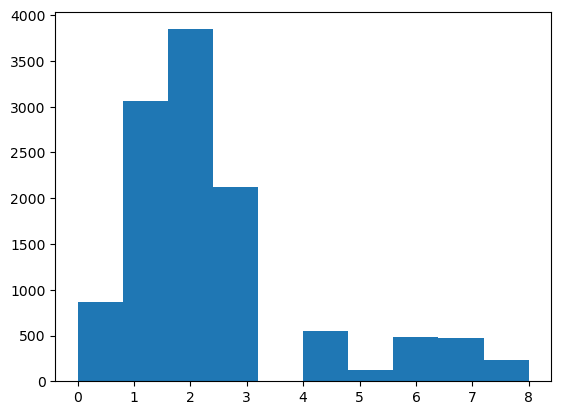

In [44]:
import matplotlib.pyplot as plt
plt.hist(scores)